**INF2178 Assignment 3**\
**Chenyang Pan**\
**1005131554**

In [1]:
# run this code to upload the data
from google.colab import files
files_upload = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data.csv


In [63]:
# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from scipy import stats

In [64]:
# read in the childcare data into dataframe
child_df = pd.read_csv('INF2178_A3_data.csv')

# **Data Examination and Cleaning**

In [65]:
# preview of the  data
child_df.head(6)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3


In [66]:
# only keep revelant columns
child_df.drop([	"fallmathscore",
               "springmathscore", "incomeinthousands"], axis=1,  inplace = True)
#remove NA terms
child_df.dropna(inplace = True)

In [67]:
# view the cleaned  data
child_df.head(6)

,fallreadingscore,fallgeneralknowledgescore,springreadingscore,springgeneralknowledgescore,totalhouseholdincome,incomegroup
0,36.58,33.822,49.37,40.533,140000.0,3
1,50.82,38.147,83.50,37.409,120000.0,3
2,40.68,28.108,40.41,29.312,90000.0,3
3,32.57,15.404,34.14,27.382,50000.0,2
4,31.98,18.727,32.84,26.977,55000.0,2
5,50.45,33.352,64.13,32.703,150000.0,3


# ****Exploratory Data Analysis (EDA)****


In [68]:
# count for each income type
child_df['count'] = 1
child_df.pivot_table(values='count', index='incomegroup', aggfunc='sum')

,count
incomegroup,
1,4729
2,3726
3,3478


Text(0.5, 0, 'income groups')

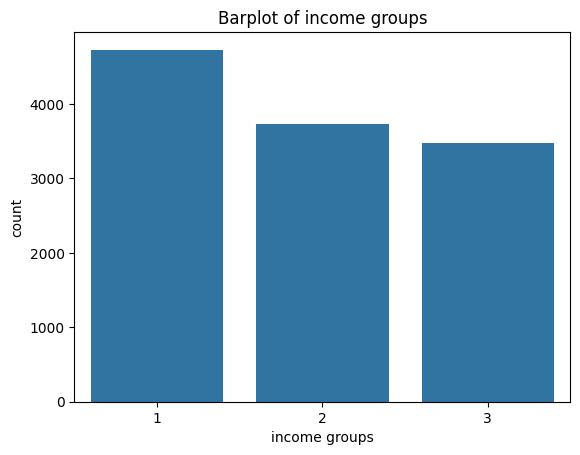

In [69]:
# barplot of each income type
sns.countplot(data= child_df, x='incomegroup')
plt.title('Barplot of income groups')
plt.xlabel('income groups')

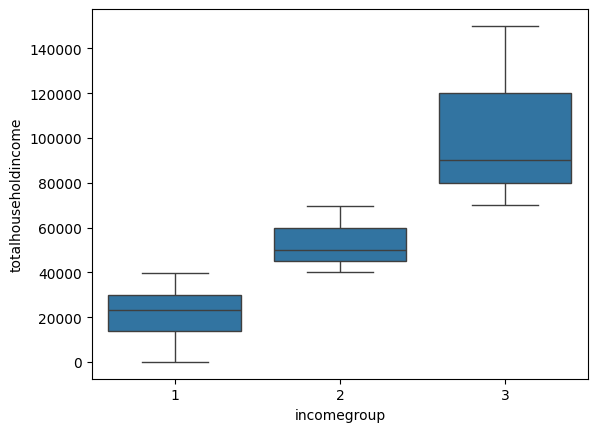

In [70]:
# boxplot of income amount by income groups
ax = sns.boxplot(x='incomegroup', y='totalhouseholdincome', data = child_df)
plt.show()

In [71]:
# code refers to INF2178 Lecture
# numerical summary statistic of dataset assoicated with type
def get_summary_statistics(dataset, type):

    mean = np.round(np.mean(dataset), 3)
    median = np.round(np.median(dataset), 3)
    min_value = np.round(dataset.min(), 3)
    max_value = np.round(dataset.max(), 3)
    quartile_1 = np.round(dataset.quantile(0.25), 3)
    quartile_3 = np.round(dataset.quantile(0.75), 3)
    spread = max_value-min_value
    sd = np.round(dataset.std(), 3)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 3)

    print('\n\n{} summary statistics'.format(type))
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('spread: %s' % spread)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('standard deviation: %s' % sd)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [72]:
# summary statistics for fall general knowledge score in income group 1
fall_1 = child_df[child_df['incomegroup'] == 1]['fallgeneralknowledgescore']
get_summary_statistics(fall_1, 'fall general knowledge score for students in income group 1')



fall general knowledge score for students in income group 1 summary statistics
Min: 6.985
Mean: 19.948
Max: 43.508
spread: 36.523
25th percentile: 14.84
Median: 19.298
standard deviation: 6.717
75th percentile: 24.643
Interquartile range (IQR): 9.803


In [73]:
# summary statistics for fall general knowledge score in income group 2
fall_2 = child_df[child_df['incomegroup'] == 2]['fallgeneralknowledgescore']
get_summary_statistics(fall_2, 'fall general knowledge score for students in income group 2')



fall general knowledge score for students in income group 2 summary statistics
Min: 7.115
Mean: 23.888
Max: 46.12
spread: 39.004999999999995
25th percentile: 18.81
Median: 23.869
standard deviation: 6.87
75th percentile: 28.593
Interquartile range (IQR): 9.783


In [74]:
# summary statistics for fall general knowledge score in income group 3
fall_3 = child_df[child_df['incomegroup'] == 3]['fallgeneralknowledgescore']
get_summary_statistics(fall_3, 'fall general knowledge score for students in income group 3')



fall general knowledge score for students in income group 3 summary statistics
Min: 7.504
Mean: 26.452
Max: 47.691
spread: 40.187000000000005
25th percentile: 21.606
Median: 26.505
standard deviation: 7.102
75th percentile: 31.367
Interquartile range (IQR): 9.761


In [75]:
# summary statistics for spring general knowledge score in income group 1
spring_1 = child_df[child_df['incomegroup'] == 1]['springgeneralknowledgescore']
get_summary_statistics(spring_1, 'spring general knowledge score for students in income group 1')



spring general knowledge score for students in income group 1 summary statistics
Min: 8.124
Mean: 25.069
Max: 45.581
spread: 37.457
25th percentile: 19.708
Median: 25.065
standard deviation: 7.248
75th percentile: 30.155
Interquartile range (IQR): 10.447


In [76]:
# summary statistics for spring general knowledge score in income group 2
spring_2 = child_df[child_df['incomegroup'] == 2]['springgeneralknowledgescore']
get_summary_statistics(spring_2, 'spring general knowledge score for students in income group 2')



spring general knowledge score for students in income group 2 summary statistics
Min: 7.858
Mean: 29.144
Max: 48.055
spread: 40.197
25th percentile: 24.498
Median: 29.476
standard deviation: 6.965
75th percentile: 34.121
Interquartile range (IQR): 9.623


In [77]:
# summary statistics for spring general knowledge score in income group 3
spring_3 = child_df[child_df['incomegroup'] == 3]['springgeneralknowledgescore']
get_summary_statistics(spring_3, 'spring general knowledge score for students in income group 3')



spring general knowledge score for students in income group 3 summary statistics
Min: 9.513
Mean: 31.568
Max: 48.345
spread: 38.832
25th percentile: 27.12
Median: 32.082
standard deviation: 6.928
75th percentile: 36.634
Interquartile range (IQR): 9.514


In [78]:
# summary statistics for fall reading score in income group 1
fall_1_1 = child_df[child_df['incomegroup'] == 1]['fallreadingscore']
get_summary_statistics(fall_1_1, 'fall reading score for students in income group 3')



fall reading score for students in income group 3 summary statistics
Min: 21.01
Mean: 32.787
Max: 118.29
spread: 97.28
25th percentile: 27.1
Median: 31.66
standard deviation: 8.092
75th percentile: 36.05
Interquartile range (IQR): 8.95


In [79]:
# summary statistics for fall reading score in income group 2
fall_1_2 = child_df[child_df['incomegroup'] == 2]['fallreadingscore']
get_summary_statistics(fall_1_2, 'fall reading  score for students in income group 3')



fall reading  score for students in income group 3 summary statistics
Min: 22.19
Mean: 36.293
Max: 138.51
spread: 116.32
25th percentile: 30.272
Median: 34.53
standard deviation: 9.994
75th percentile: 40.0
Interquartile range (IQR): 9.728


In [80]:
# summary statistics for fall reading score in income group 3
fall_1_3 = child_df[child_df['incomegroup'] == 3]['fallreadingscore']
get_summary_statistics(fall_1_3, 'fall reading  score for students in income group 3')



fall reading  score for students in income group 3 summary statistics
Min: 23.01
Mean: 39.898
Max: 133.56
spread: 110.55
25th percentile: 32.78
Median: 37.575
standard deviation: 12.289
75th percentile: 44.23
Interquartile range (IQR): 11.45


In [81]:
# summary statistics for spring reading  score in income group 1
spring_1_1= child_df[child_df['incomegroup'] == 1]['springreadingscore']
get_summary_statistics(spring_1_1, 'spring reading  score for students in income group 3')



spring reading  score for students in income group 3 summary statistics
Min: 22.35
Mean: 43.665
Max: 142.49
spread: 120.14000000000001
25th percentile: 36.1
Median: 41.97
standard deviation: 12.005
75th percentile: 48.53
Interquartile range (IQR): 12.43


In [82]:
# summary statistics for spring reading score in income group 2
spring_1_2 = child_df[child_df['incomegroup'] == 2]['springreadingscore']
get_summary_statistics(spring_1_2, 'spring reading  score for students in income group 3')



spring reading  score for students in income group 3 summary statistics
Min: 23.93
Mean: 48.009
Max: 142.49
spread: 118.56
25th percentile: 39.872
Median: 46.065
standard deviation: 13.505
75th percentile: 52.168
Interquartile range (IQR): 12.296


In [83]:
# summary statistics for spring reading  score in income group 3
spring_1_3 = child_df[child_df['incomegroup'] == 3]['springreadingscore']
get_summary_statistics(spring_1_3, 'spring reading  score for students in income group 3')



spring reading  score for students in income group 3 summary statistics
Min: 24.54
Mean: 52.207
Max: 156.85
spread: 132.31
25th percentile: 42.78
Median: 48.74
standard deviation: 16.45
75th percentile: 56.238
Interquartile range (IQR): 13.458


Text(0.5, 9.444444444444438, 'fall general knowledge score')

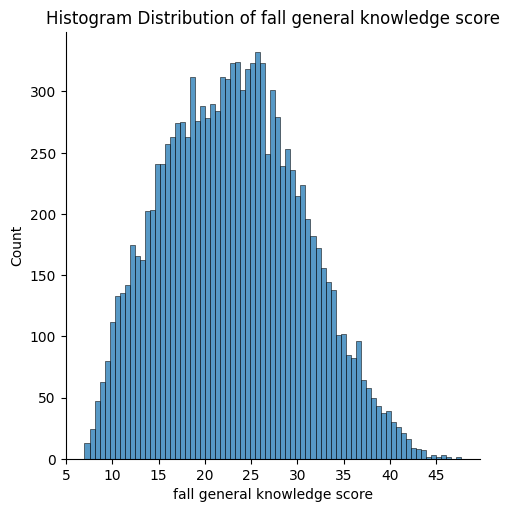

In [84]:
# Histogram Distribution of fall general knowledge score
sns.displot(child_df["fallgeneralknowledgescore"], bins=75)
plt.title('Histogram Distribution of fall general knowledge score')
plt.xlabel('fall general knowledge score')

Text(0.5, 9.444444444444438, 'spring general knowledge score')

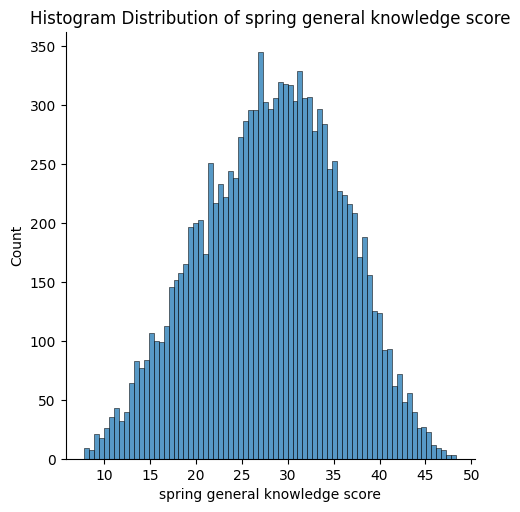

In [85]:
# Histogram Distribution of spring general knowledge score
sns.displot(child_df["springgeneralknowledgescore"], bins=75)
plt.title('Histogram Distribution of spring general knowledge score')
plt.xlabel('spring general knowledge score')

Text(0.5, 9.444444444444438, 'fall reading score')

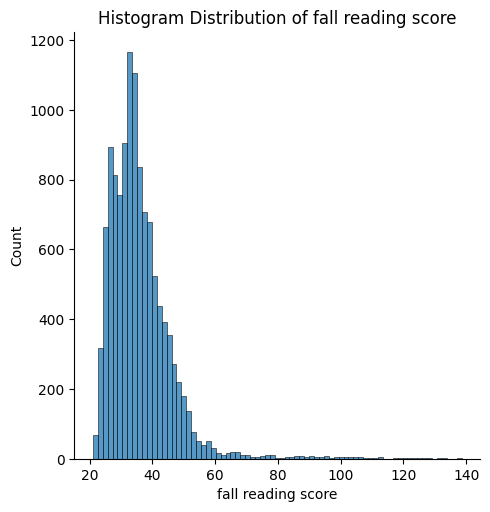

In [86]:
# Histogram Distribution of fall reading score
sns.displot(child_df["fallreadingscore"], bins=75)
plt.title('Histogram Distribution of fall reading score')
plt.xlabel('fall reading score')

Text(0.5, 9.444444444444438, 'spring reading score')

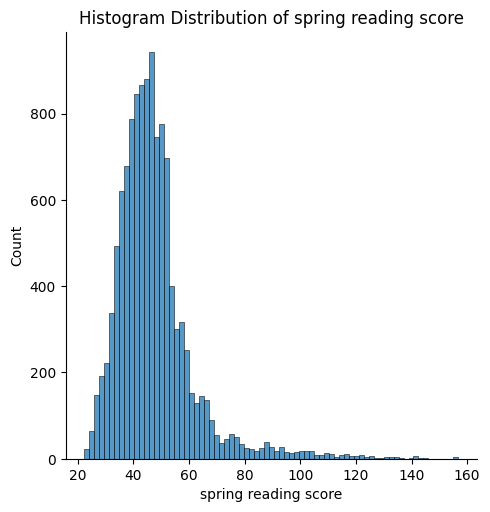

In [87]:
# Histogram Distribution of spring reading score
sns.displot(child_df["springreadingscore"], bins=75)
plt.title('Histogram Distribution of spring reading score')
plt.xlabel('spring reading score')

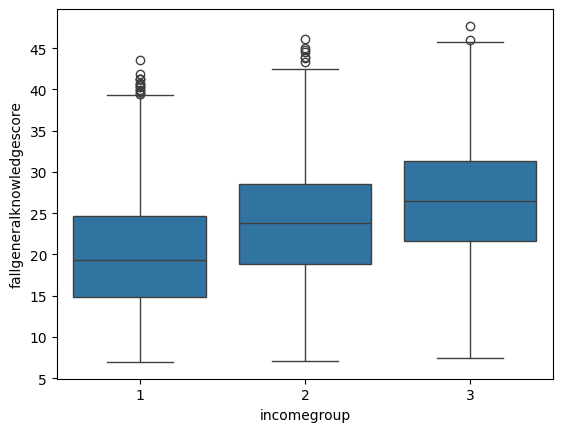

In [88]:
# boxplot of fall g k score by income groups
ax = sns.boxplot(x='incomegroup', y='fallgeneralknowledgescore', data = child_df)
plt.show()

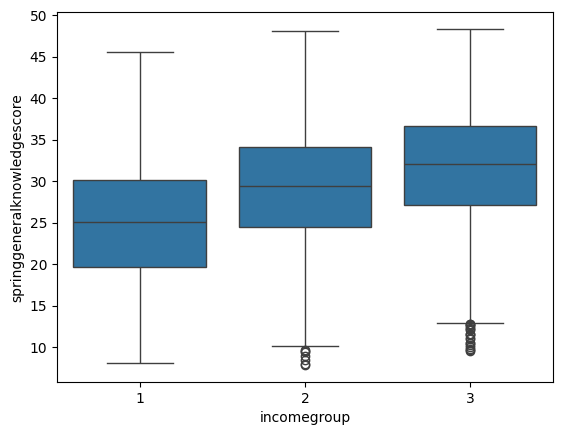

In [89]:
# boxplot of spring g k score by income groups
ax = sns.boxplot(x='incomegroup', y='springgeneralknowledgescore', data = child_df)
plt.show()

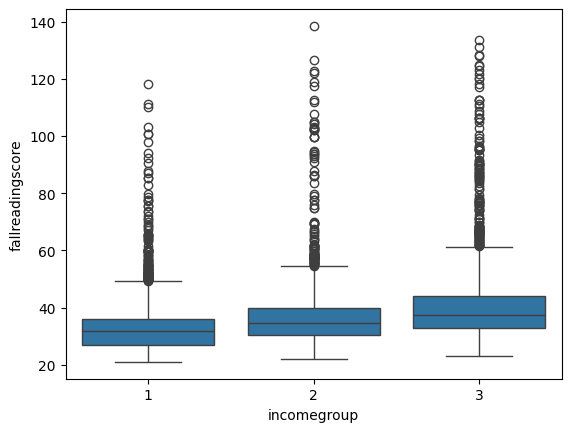

In [90]:
# boxplot of fall reading  score by income groups
ax = sns.boxplot(x='incomegroup', y='fallreadingscore', data = child_df)
plt.show()

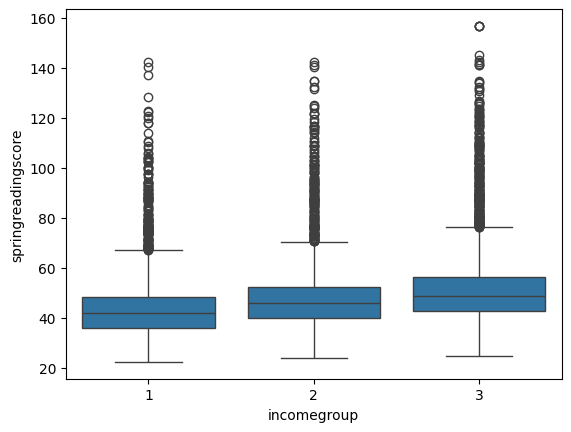

In [91]:
# boxplot of spring reading  score by income groups
ax = sns.boxplot(x='incomegroup', y='springreadingscore', data = child_df)
plt.show()

Text(0.5, 0, 'Fall general knowledge score')

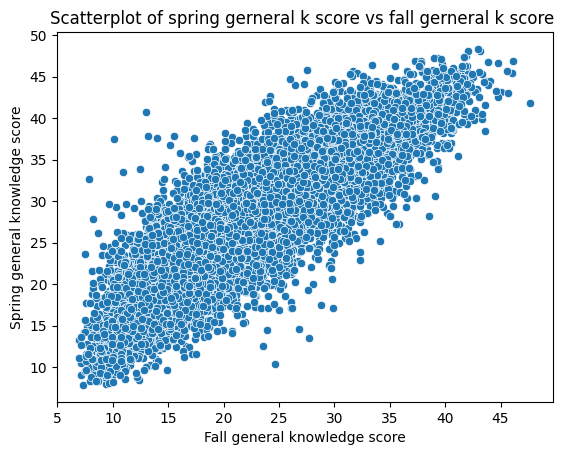

In [92]:
# Scatterplot of spring general knowledge score vs fall general knowledge score
sns.scatterplot(x= child_df["fallgeneralknowledgescore"],
                y= child_df["springgeneralknowledgescore"])
plt.title('Scatterplot of spring gerneral k score vs fall gerneral k score ')
plt.ylabel('Spring general knowledge score')
plt.xlabel('Fall general knowledge score')

Text(0.5, 0, 'Fall reading score')

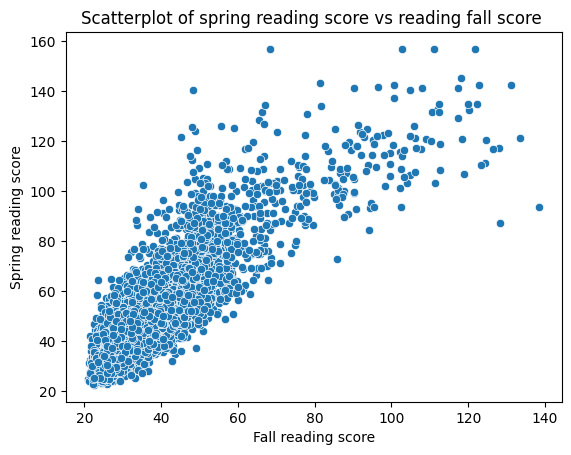

In [93]:
# Scatterplot of spring reading  score vs fall reading score
sns.scatterplot(x= child_df["fallreadingscore"],
                y= child_df["springreadingscore"])
plt.title('Scatterplot of spring reading score vs reading fall score ')
plt.ylabel('Spring reading score')
plt.xlabel('Fall reading score')

**Narrative About the Data**

We first had a preview of the children scores data set. There are 9 features in total with 8 numerical variables and 1 categorical variable. Since our analysis will majorly focus on the general knowledge and reading score, we will keep only the relevant features which are the 1998 fall and 1999 spring general knowledge and reading scores, the income groups and the income amount of each student. Then, we drop the NA terms in the data and performed exploratory data analysis (EDA)

In the EDA, we first took a look at the distribution of students in different income groups, both numerically, showing the number of them in each income group, and visually, using barplot. We can see from both analyses that the number of  students in three income groups is quite similar with income group 1 having the highest. Then, we perform a side boxplot of the total income amount by each income group and we found a pattern that income group 1 has the lowest median and income group 3 has the highest median. Moreover, the highest income in group 1 is lower than the minimum income in group 2 and the highest the income in group2 is lower the the minimum income in group 3 which provide the evidence to tell us that in come group1 is low income group,  group 2 is median income group and group3 is high income group. Then I perform the summary statistics for both fall and spring general knowledge scores and fall and spring reading scores grouped by different income groups. Some important messages delivered from  the summary statistic. First, we can find that the mean and median of student scores in low income families is lowest and high income families are the highest in both reading and generla knowledges. This pattern is found to be the same in the spring scores for both. All groups have similar standard deviations. Another thing to be found is that for all three income groups, the mean and median scores of spring are higher than fall which implies all three students in all groups are improving for bothe reading and gerneral knowledge. From the histogram of spring score and fall score of both reading and general knowledge, we can also detect the former observations. However, general knowleges histograms are quite symmetric and are unimodal, reading score histograms are abit right skewed. From the two side by side boxplot of spring and fall score of reading and general knowledge score by income groups. We found a similar pattern. From the scatter plot between the fall score and spring score for bother reading and general knowledges, we have detected a linear positive correlation which implies that the spring student score may be affected by their fall score in both reading and general knowledge. Which may also implies that the fall score could potentially be the covariate that we may need to control in ANCOVA.


# ****One Way ANCOVA****

In [94]:
# import packges for ANCOVA model
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
%pip install bioinfokit
from bioinfokit.analys import stat

In [95]:
# code refer to INF2178 lecture
# general knowledge score
# Fit ANCOVA model
model = ols('springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore', data= child_df).fit()

# Print model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.621e+04
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 02:25:14   Log-Likelihood:                -33263.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11930   BIC:                         6.656e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [96]:
# reading score
# Fit ANCOVA model
model_2 = ols('springreadingscore ~ incomegroup + fallreadingscore', data= child_df).fit()

# Print model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:25:16   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11930   BIC:                         8.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3272      0.280  

**Model assumption check**

In [97]:
# code refer to INF2178 lecture
# general knowledge
# find model residuals
res = model.resid

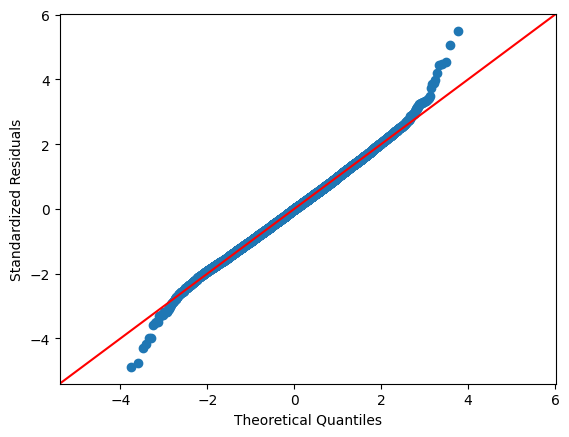

In [98]:
# QQ plot to do normality checking
standard_res = res / res.std()
sm.qqplot(standard_res, line = '45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [99]:
# checking homogeneity of variance
res = stat()
res.bartlett(df= child_df, res_var='springgeneralknowledgescore', xfac_var='incomegroup')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),10.4095
1,Degrees of freedom (Df),2.0000
2,p value,0.0055


In [100]:
# reading score
# find model residuals
res_2 = model_2.resid

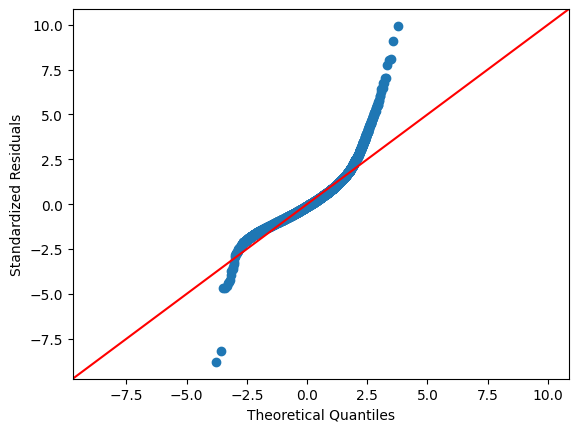

In [101]:
# QQ plot to do normality checking
standard_res_2 = res_2 / res_2.std()
sm.qqplot(standard_res_2, line = '45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [102]:
# checking homogeneity of variance
res_2 = stat()
res_2.bartlett(df= child_df, res_var='springreadingscore', xfac_var='incomegroup')
res_2.bartlett_summary

,Parameter,Value
0,Test statistics (T),412.1746
1,Degrees of freedom (Df),2.0000
2,p value,0.0000
